In [1]:
import numpy as np
import matplotlib.pyplot as plt

## 9.6 Lab: Support Vector Machines

### 9.6.1 Support Vector Classifier

We now fit the support vector classifier for a
given value of the cost parameter. Here we demonstrate the use of this
function on a two-dimensional example so that we can plot the resulting
decision boundary. We begin by generating the observations, which belong to two classes, and checking whether the classes are linearly separable.

Text(0, 0.5, 'X2')

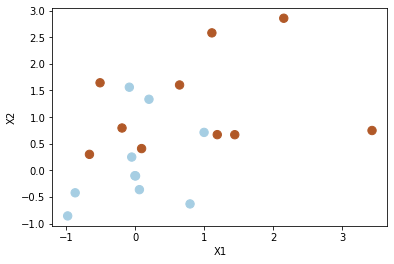

In [2]:
np.random.seed(5)
X = np.random.randn(20,2)
y = np.repeat([1,-1], 10)
# making half the samples with mean 1 instead of 0
X[y == 1] = X[y == 1] +1
# plotting the two groups
plt.scatter(X[:,0], X[:,1], s=70, c=y, cmap=plt.cm.Paired)
plt.xlabel('X1')
plt.ylabel('X2')


They are not. Next, we fit the support vector classifier.

In [3]:
# Function to plot from https://scikit-learn.org/0.18/auto_examples/svm/plot_iris.html

def plot_svm(clf, X, y, h, plot_sv = True):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.3)

     # Support vectors are crosses
    sv = clf.support_vectors_
    if plot_sv:
        plt.scatter(sv[:,0], sv[:,1],c = 'k', marker='x', s=100, linewidths=1)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.show()



    display('Number of support vectors: ', svc.support_.size)
    

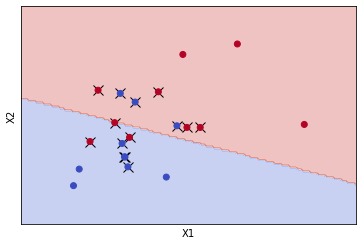

'Number of support vectors: '

14

In [4]:
from sklearn.svm import SVC
svc = SVC(C=1, kernel='linear')
svc.fit(X, y)
plot_svm(svc, X, y, 0.05)


The
region of feature space that will be assigned to the −1 class is shown in
light blue, and the region that will be assigned to the +1 class is shown in
red. The decision boundary between the two classes is linear (because we
used the argument kernel="linear"), though due to the way in which the
plotting function is implemented in this library the decision boundary look somewhat jagged in the plot.

What if we instead used a smaller value of the cost parameter?

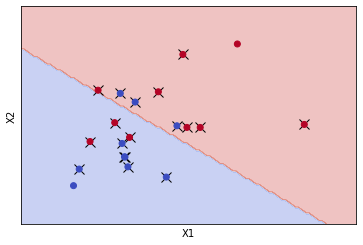

'Number of support vectors: '

18

In [5]:
svc = SVC(C=0.1, kernel='linear')
svc.fit(X, y)
plot_svm(svc, X, y, 0.05)

Now that a smaller value of the cost parameter is being used, we obtain a
larger number of support vectors, because the margin is now wider. Unfortunately, the svm() function does not explicitly output the coefficients of
the linear decision boundary obtained when the support vector classifier is
fit, nor does it output the width of the margin.

We now perform cross-validaiton on C:

In [6]:
from sklearn.model_selection import GridSearchCV
import pandas as pd

c_grid = [{'C': [0.001, 0.01, 0.1, 1, 5, 10, 100]}]
clf = GridSearchCV(SVC(kernel='linear'), c_grid, cv=10, scoring='accuracy')
clf.fit(X, y)
results = pd.DataFrame(clf.cv_results_)[['mean_test_score', 'std_test_score', 'params']]
display(results)

,mean_test_score,std_test_score,params
0,0.65,0.229129,{'C': 0.001}
1,0.65,0.229129,{'C': 0.01}
2,0.70,0.244949,{'C': 0.1}
3,0.70,0.244949,{'C': 1}
4,0.70,0.244949,{'C': 5}
5,0.70,0.244949,{'C': 10}
6,0.70,0.244949,{'C': 100}


We see that cost=0.001 and 0.01 results in the lowest cross-validation error rate

The predict() function can be used to predict the class label on a set of
test observations, at any given value of the cost parameter. We begin by
generating a test data set.

Text(0, 0.5, 'X2')

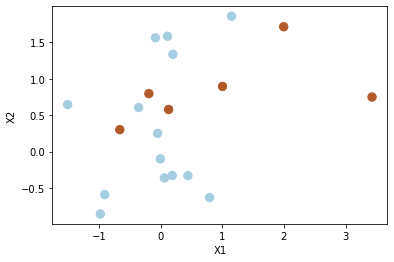

In [7]:
np.random.seed(5)
X_test = np.random.randn(20,2)
y_test = np.random.choice([-1,1], 20)
# making half the samples with mean 1 instead of 0
X_test[y_test == 1] = X_test[y_test == 1] +1
# plotting the two groups
plt.scatter(X_test[:,0], X_test[:,1], s=70, c=y_test, cmap=plt.cm.Paired)
plt.xlabel('X1')
plt.ylabel('X2')

Now we predict the class labels of these test observations. Here we use the
best model obtained through cross-validation in order to make predictions.

'C = 0.1'

,-1,1
-1,10,4
1,3,3


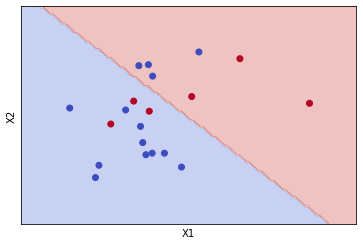

'Number of support vectors: '

18

In [8]:
from sklearn.metrics import confusion_matrix
display(f"C = {clf.best_estimator_.C}")
y_pred = clf.best_estimator_.predict(X_test)
results =pd.DataFrame(confusion_matrix(y_test, y_pred),index=svc.classes_, columns=svc.classes_)
display(results)
plot_svm(clf.best_estimator_, X_test, y_test, 0.05, plot_sv=False)


Thus, with this value of cost C = 0.1, 13 of the test observations are correctly
classified. What if we had instead used cost=0.01?

,-1,1
-1,10,4
1,3,3


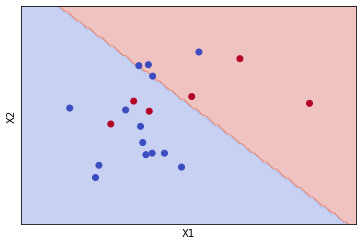

'Number of support vectors: '

20

In [9]:
svc = SVC(C=0.01, kernel='linear')
svc.fit(X, y)
y_pred = svc.predict(X_test)
results =pd.DataFrame(confusion_matrix(y_test, y_pred),index=svc.classes_, columns=svc.classes_)
display(results)
plot_svm(svc, X_test, y_test, 0.05, plot_sv=False)


This is the same prediction, but the boundary is slightly further up.

Now consider a situation in which the two classes are linearly separable.
Then we can find a separating hyperplane using the svm() function. We
first further separate the two classes in our simulated data so that they are
linearly separable:

Text(0, 0.5, 'X2')

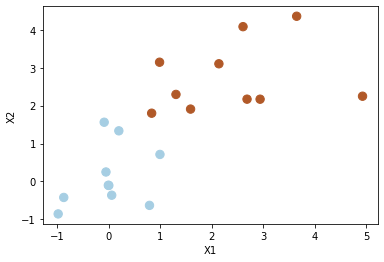

In [10]:
X[y == 1] = X[y == 1] + 1.5
plt.scatter(X[:,0], X[:,1], s=70, c=y, cmap=plt.cm.Paired)
plt.xlabel('X1')
plt.ylabel('X2')

Now the observations are just barely linearly separable. We fit the support
vector classifier and plot the resulting hyperplane, using a very large value
of cost so that no observations are misclassified

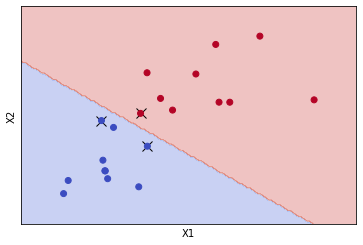

'Number of support vectors: '

3

In [11]:
svc = SVC(C=10000, kernel='linear')
svc.fit(X, y)
plot_svm(svc, X, y, 0.05)

No training errors were made and only three support vectors were used.
However, we can see from the figure that the margin is very narrow (because
the observations that are not support vectors, indicated as circles, are very close to the decision boundary). It seems likely that this model will perform
poorly on test data. We now try a smaller value of cost:

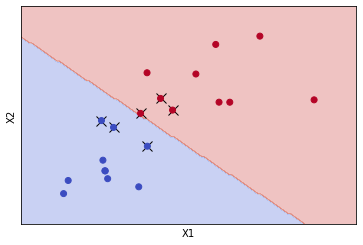

'Number of support vectors: '

6

In [12]:
svc = SVC(C=0.5, kernel='linear')
svc.fit(X, y)
plot_svm(svc, X, y, 0.05)

Using cost=0.5, we also obtain
a much wider margin and make use of 6 support vectors. It seems
likely that this model will perform better on test data than the model with
cost=1e5.

### 9.6.2 Support Vector Machine
In order to fit an SVM using a non-linear kernel, we once again use the svm()
function. However, now we use a different value of the parameter kernel.
To fit an SVM with a polynomial kernel we use kernel="poly", and
to fit an SVM with a radial kernel we use kernel="RBF". In the former
case we also use the degree argument to specify a degree for the polynomial
kernel (this is d in (9.22)), and in the latter case we use gamma to specify a
value of γ for the radial basis kernel (9.24).
We first generate some data with a non-linear class boundary, as follows:

Text(0, 0.5, 'X2')

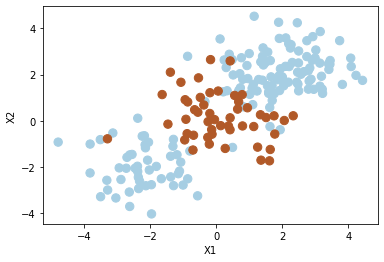

In [13]:
from sklearn.model_selection import train_test_split
# Generate test data
np.random.seed(5)
X = np.random.randn(200,2)
X[:100] = X[:100] +2
X[101:150] = X[101:150] -2
y = np.concatenate([np.repeat(-1, 150), np.repeat(1,50)])
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5, random_state=2)
plt.scatter(X[:,0], X[:,1], s=70, c=y, cmap=plt.cm.Paired)
plt.xlabel('X1')
plt.ylabel('X2')

The data is randomly split into training and testing groups. We then fit
the training data using the svm() function with a radial kernel and γ = 1:

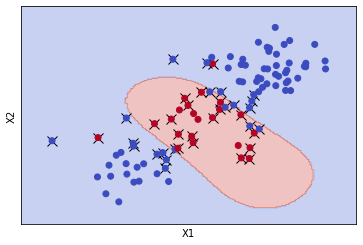

'Number of support vectors: '

39

In [14]:
svc = SVC(C=1, kernel='rbf')
svc.fit(X_train, y_train)
plot_svm(svc, X_train, y_train, 0.05)

We can see from the figure that there are a fair number of training errors
in this SVM fit. If we increase the value of cost, we can reduce the number
of training errors. However, this comes at the price of a more irregular
decision boundary that seems to be at risk of overfitting the data.

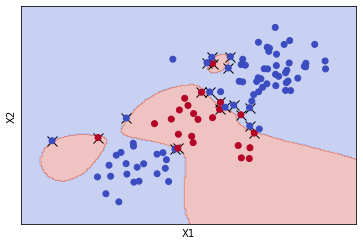

'Number of support vectors: '

20

In [15]:
svc = SVC(C=1e5, kernel='rbf')
svc.fit(X_train, y_train)
plot_svm(svc, X_train, y_train, 0.05)

We can perform cross-validation to select the best choice of
γ and cost for an SVM with a radial kernel:

In [16]:
grid = [{'C': [0.001, 0.01, 0.1, 1, 5, 10, 100,], 'gamma': [0.5, 1, 2, 3, 4,]}]
clf = GridSearchCV(SVC(kernel='rbf'), grid, cv=10, scoring='accuracy')
clf.fit(X_train, y_train)
results = pd.DataFrame(clf.cv_results_)[['mean_test_score', 'std_test_score', 'params']]
display(results.head())

,mean_test_score,std_test_score,params
0,0.77,0.045826,"{'C': 0.001, 'gamma': 0.5}"
1,0.77,0.045826,"{'C': 0.001, 'gamma': 1}"
2,0.77,0.045826,"{'C': 0.001, 'gamma': 2}"
3,0.77,0.045826,"{'C': 0.001, 'gamma': 3}"
4,0.77,0.045826,"{'C': 0.001, 'gamma': 4}"


We
can view the test set predictions for this model by applying the predict()
function to the data.

'C = 1'

'gamma = 0.5'

,-1,1
-1,70,3
1,12,15


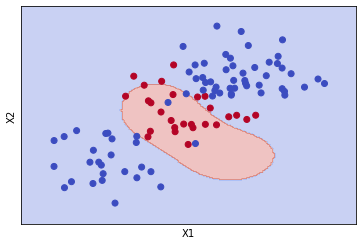

'Number of support vectors: '

20

In [17]:
display(f"C = {clf.best_estimator_.C}")
display(f"gamma = {clf.best_estimator_.gamma}")
y_pred = clf.best_estimator_.predict(X_test)
results =pd.DataFrame(confusion_matrix(y_test, y_pred),index=svc.classes_, columns=svc.classes_)
display(results)
plot_svm(clf.best_estimator_, X_test, y_test, 0.05, plot_sv=False )

15% of test observations are misclassified by this SVM

### 9.6.3 ROC Curve

SVMs and support vector classifiers output class labels for each observation. However, it is also possible to obtain fitted values for each observation,
which are the numerical scores used to obtain the class labels. For instance,
in the case of a support vector classifier, the fitted value for an observation
X = (X1, X2,...,Xp)T takes the form βˆ0 + βˆ1X1 + βˆ2X2 + ... + βˆpXp.
For an SVM with a non-linear kernel, the equation that yields the fitted
value is given in (9.23). In essence, the sign of the fitted value determines
on which side of the decision boundary the observation lies. Therefore, the
relationship between the fitted value and the class prediction for a given
observation is simple: if the fitted value exceeds zero then the observation
is assigned to one class, and if it is less than zero then it is assigned to the
other.


In [18]:
svc1 = SVC(C=1,gamma = 2, kernel='rbf')
svc1.fit(X_train, y_train)

svc2 = SVC(C=1, gamma = 50, kernel='rbf')
svc2.fit(X_train, y_train)


SVC(C=1, gamma=50)

Now we can produce the ROC plot

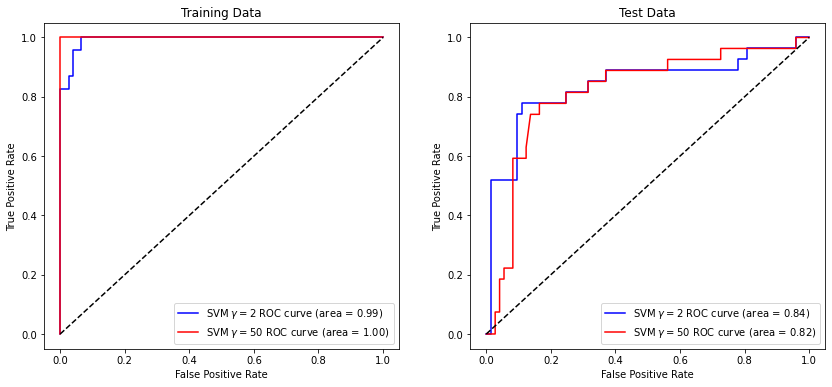

In [19]:
# Compute ROC curve and ROC area for each class
from sklearn.metrics import roc_curve, auc

y_train_score1 = svc1.decision_function(X_train)
fpr1, tpr1, _ = roc_curve(y_train, y_train_score1)
roc_auc1 = auc(fpr1, tpr1)

y_train_score2 = svc2.decision_function(X_train)
fpr2, tpr2, _ = roc_curve(y_train, y_train_score2)
roc_auc2 = auc(fpr2, tpr2)

fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(14,6))
ax1.plot(fpr1, tpr1, label='SVM $\gamma = 2$ ROC curve (area = %0.2f)' % roc_auc1, color='b')
ax1.plot(fpr2, tpr2, label='SVM $\gamma = 50$ ROC curve (area = %0.2f)' % roc_auc2, color='r')
ax1.set_title('Training Data')

y_test_score1 = svc1.decision_function(X_test)
fpr1, tpr1, _ = roc_curve(y_test, y_test_score1)
roc_auc1 = auc(fpr1, tpr1)

y_test_score2 = svc2.decision_function(X_test)
fpr2, tpr2, _ = roc_curve(y_test, y_test_score2)
roc_auc2 = auc(fpr2, tpr2)

ax2.plot(fpr1, tpr1, label='SVM $\gamma = 2$ ROC curve (area = %0.2f)' % roc_auc1, color='b')
ax2.plot(fpr2, tpr2, label='SVM $\gamma = 50$ ROC curve (area = %0.2f)' % roc_auc2, color='r')
ax2.set_title('Test Data')

for ax in fig.axes:
    ax.plot([0, 1], [0, 1], 'k--')
    #ax.set_xlim([-0.05, 1.0])
    #ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.legend(loc="lower right")

SVM appears to be producing accurate predictions. By increasing γ we can
produce a more flexible fit and generate further improvements in accuracy.
However, these ROC curves are all on the training data. We are really
more interested in the level of prediction accuracy on the test data. When
we compute the ROC curves on the test data, the model with γ = 2 appears
to provide the most accurate results.

### 9.6.4 SVM with Multiple Classes
If the response is a factor containing more than two levels, then the svm()
function will perform multi-class classification using the one-versus-one approach. We explore that setting here by generating a third class of observations.


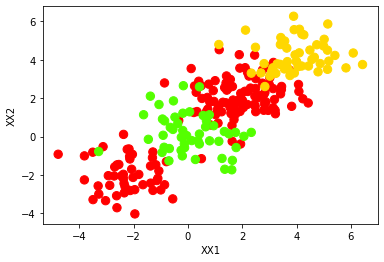

In [20]:
np.random.seed(5)

XX = np.vstack([X, np.random.randn(50,2)])
yy = np.hstack([y, np.repeat(0,50)])
XX[yy ==0] = XX[yy == 0] +4

plt.scatter(XX[:,0], XX[:,1], s=70, c=yy, cmap=plt.cm.prism)
plt.xlabel('XX1')
plt.ylabel('XX2');



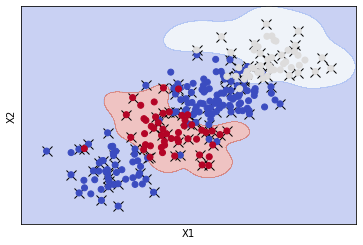

'Number of support vectors: '

20

In [21]:
svm5 = SVC(C=10,gamma = 1, kernel='rbf', decision_function_shape='ovo', )
svm5.fit(XX, yy)
plot_svm(svm5, XX, yy, h= 0.01 )

### 9.6.5 Application to Gene Expression Data

We now examine the Khan data set, which consists of a number of tissue
samples corresponding to four distinct types of small round blue cell tumors. For each tissue sample, gene expression measurements are available.
The data set consists of training data, xtrain and ytrain, and testing data,
xtest and ytest.
We examine the dimension of the data:



In [22]:
# Load Khan data set from  R ISLR package
X_train = pd.read_csv('Data/Khan_xtrain.csv', index_col=0)
y_train = pd.read_csv('Data/Khan_ytrain.csv',  index_col=0)
X_test = pd.read_csv('Data/Khan_xtest.csv',  index_col=0)
y_test = pd.read_csv('Data/Khan_ytest.csv',  index_col=0)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(63, 2308)
(63, 1)
(20, 2308)
(20, 1)


This data set consists of expression measurements for 2,308 genes.
The training and test sets consist of 63 and 20 observations respectively.

We will use a support vector approach to predict cancer subtype using gene
expression measurements. In this data set, there are a very large number
of features relative to the number of observations. This suggests that we
should use a linear kernel, because the additional flexibility that will result
from using a polynomial or radial kernel is unnecessary.

In [23]:
svc = SVC(kernel='linear', C = 10)
svc.fit(X_train, y_train.values.ravel())

cm = confusion_matrix(y_train.values.ravel(), svc.predict(X_train))
cm_df = pd.DataFrame(cm.T, index=svc.classes_, columns=svc.classes_)
cm_df.index.name = 'Predicted'
cm_df.columns.name = 'True'
print(cm_df)

True       1   2   3   4
Predicted               
1          8   0   0   0
2          0  23   0   0
3          0   0  12   0
4          0   0   0  20


We see that there are no training errors. In fact, this is not surprising,
because the large number of variables relative to the number of observations
implies that it is easy to find hyperplanes that fully separate the classes. We
are most interested not in the support vector classifier’s performance on the
training observations, but rather its performance on the test observations

In [24]:
cm = confusion_matrix(y_test.values.ravel(), svc.predict(X_test))
cm_df = pd.DataFrame(cm.T, index=svc.classes_, columns=svc.classes_)
cm_df.index.name = 'Predicted'
cm_df.columns.name = 'True'
print(cm_df)

True       1  2  3  4
Predicted            
1          3  0  0  0
2          0  6  2  0
3          0  0  4  0
4          0  0  0  5


We see that using cost=10 yields two test set errors on this data